In [0]:
# DF es el dataframe agrupado por año y mes

# import libraries that will be needed
import pandas as pd
import numpy as np

# agarrar la tabla del container
df = spark.read.csv(
    "/mnt/data_lake/SandBox/DataAnalytics/jaime_figueroa/TAM/RawData/TablaDQUAPIB", 
    header=True, 
    inferSchema=True,
    lineSep="\n")

# convertir la tabla en pandas
df = df.toPandas()

# la tabla tiene un nombre inusual en la útlima columna. aquí lo cambiamos a Lag3
df.rename(columns={'Lag3\r':'Lag3'}, inplace=True)

# creamos una función para agregar una columna de trimestre con label de string
def trimestre(df):
  if df['MONTH'] <= 3:
    return 'T1'
  elif df['MONTH'] >= 4 and df['MONTH'] <= 6:
    return 'T2'
  elif df['MONTH'] >= 7 and df['MONTH'] <= 9:
    return 'T3'
  else:
    return 'T4'

# creamos una función para agregar una columna de trimestre con label numérico
def trimestre2(df):
  if df['MONTH'] <= 3:
    return 1
  elif df['MONTH'] >= 4 and df['MONTH'] <= 6:
    return 2
  elif df['MONTH'] >= 7 and df['MONTH'] <= 9:
    return 3
  else:
    return 4
  
# usamos las funciones para agregar las variables nuevas
df['Trimestre'] = df.apply(trimestre, axis=1)
df['Trimestre2'] = df.apply(trimestre2, axis=1)

In [0]:
# vemos el resultado del df
pd.set_option('display.max_rows', None)
df

Out[2]:

,YEAR,MONTH,DQUA,TasaDeCambio,CPIMex,Intereses,IGAE,CETES,GasolinaRegular,GasolinaPremium,CPIGas,Cobre,Aluminio,TexOil,GasNatural,Acero,EMBI,ElectricGenTransDist,RegistroRUV,VerificacionRUV,ProduccionRUV,PIBMex,PIBForFish,PIBConstr,PIBExtract,PIBManuf,PIBBev,PIBUtil,PIBElec,PIBServ,Lag12,Lag6,Lag3,Trimestre,Trimestre2
0,2011,1,54.0,12.1,75.3,4.9,93.4,4.1,8.84,10.14,53.6,9555.0,2439.0,89.4,4.5,728.2,130.6,73.9,25395.27,22263.97,20575.54,86.06,2.72,6.51,4.04,15.26,3.88,1.32,1.02,51.55,73.0,63.0,89.0,T1,1
1,2011,2,86.0,12.1,75.6,4.9,93.5,4.0,8.92,10.18,53.9,9867.0,2508.0,89.6,4.1,810.2,133.0,74.8,25193.89,22052.76,20575.13,86.06,2.72,6.51,4.04,15.26,3.88,1.32,1.02,51.55,73.0,38.0,167.0,T1,1
2,2011,3,169.0,12.0,75.7,4.9,94.1,4.3,9.00,10.22,54.4,9530.0,2552.0,102.9,4.0,873.0,132.0,76.0,25060.77,21933.48,20508.80,86.06,2.72,6.51,4.04,15.26,3.88,1.32,1.02,51.55,92.0,107.0,112.0,T1,1
3,2011,4,55.0,11.7,75.7,4.9,93.6,4.3,9.08,10.26,55.0,9483.0,2662.0,110.0,4.2,847.0,134.1,73.0,25000.70,21876.70,20415.99,86.51,2.52,6.73,4.08,15.21,3.89,1.34,1.03,51.73,41.0,89.0,54.0,T2,2
4,2011,5,138.0,11.7,75.2,4.9,94.5,4.3,9.16,10.30,55.2,8926.0,2592.0,101.3,4.3,789.6,140.7,71.6,24881.67,21755.70,20344.41,86.51,2.52,6.73,4.08,15.21,3.89,1.34,1.03,51.73,98.0,167.0,86.0,T2,2
5,2011,6,400.0,11.8,75.2,4.9,95.1,4.4,9.24,10.34,55.0,9045.0,2555.0,96.3,4.6,750.6,143.7,72.7,24789.08,21662.33,20291.82,86.51,2.52,6.73,4.08,15.21,3.89,1.34,1.03,51.73,60.0,112.0,169.0,T2,2
6,2011,7,329.0,11.7,75.5,4.9,95.5,4.1,9.32,10.38,55.2,9619.0,2512.0,97.2,4.4,711.3,135.8,73.5,24796.99,21631.09,20172.33,88.17,2.87,6.82,4.07,15.39,3.98,1.34,1.03,52.61,63.0,54.0,55.0,T3,3
7,2011,8,276.0,12.2,75.6,4.9,96.1,4.1,9.40,10.42,55.4,9041.0,2392.0,86.3,4.1,668.4,166.8,72.6,24635.41,21552.08,20078.92,88.17,2.87,6.82,4.07,15.39,3.98,1.34,1.03,52.61,38.0,86.0,138.0,T3,3
8,2011,9,425.0,13.1,75.8,4.8,96.2,4.2,9.48,10.46,55.5,8314.0,2296.0,85.6,3.9,692.1,210.7,73.7,24491.39,21422.96,20030.65,88.17,2.87,6.82,4.07,15.39,3.98,1.34,1.03,52.61,107.0,169.0,400.0,T3,3
9,2011,10,209.0,13.4,76.3,4.8,96.2,4.4,9.56,10.50,56.0,7347.0,2172.0,86.4,3.6,659.0,203.1,76.4,24316.43,21279.22,19955.99,88.79,2.72,7.00,4.12,15.69,4.01,1.34,1.04,52.60,89.0,55.0,329.0,T4,4


In [0]:
# buscamos las correlaciones entre las variables y DQUA para ver qué usar en el modelo
df.corr()['DQUA'].sort_values(ascending=False)

Out[3]: DQUA 1.000000
Lag3 0.329772
Lag12 0.288375
ProduccionRUV 0.209819
Lag6 0.208159
MONTH 0.203194
PIBConstr 0.200473
Trimestre2 0.182845
VerificacionRUV 0.154064
RegistroRUV 0.137773
IGAE 0.129289
PIBMex 0.119596
PIBManuf 0.119105
PIBExtract 0.111761
PIBServ 0.068039
PIBForFish 0.038247
PIBElec 0.035569
PIBUtil 0.034237
TasaDeCambio 0.034046
EMBI 0.008152
PIBBev -0.024251
GasolinaRegular -0.030053
YEAR -0.030346
CPIMex -0.036002
ElectricGenTransDist -0.045845
CPIGas -0.048968
GasolinaPremium -0.052751
Acero -0.126681
TexOil -0.135252
GasNatural -0.143416
CETES -0.180696
Intereses -0.195331
Cobre -0.198030
Aluminio -0.230472
Name: DQUA, dtype: float64

In [0]:
# el DF2 es el dataframe agrupado por año y trimestre

# se agrupa por año y trimestre y luego se resetea el índice para tener la tabla
df2 = df.groupby(['YEAR','Trimestre']).agg({'DQUA':'sum', 'TasaDeCambio':'mean','CPIMex':'mean', 'Intereses':'mean',	'IGAE':'mean','CETES':'mean','GasolinaRegular':'mean','GasolinaPremium':'mean','CPIGas':'mean','Cobre':'mean','Aluminio':'mean','TexOil':'mean','GasNatural':'mean','Acero':'mean','EMBI':'mean','ElectricGenTransDist':'mean','RegistroRUV':'sum','VerificacionRUV':'sum','ProduccionRUV':'sum','PIBMex':'sum','PIBForFish':'sum','PIBConstr':'sum','PIBExtract':'sum','PIBManuf':'sum','PIBBev':'sum','PIBUtil':'sum','PIBElec':'sum','PIBServ':'sum','Lag12':'sum','Lag6':'sum', 'Lag3':'sum','Trimestre2':'mean'}).reset_index()

df2.head()

Out[4]:

,YEAR,Trimestre,DQUA,TasaDeCambio,CPIMex,Intereses,IGAE,CETES,GasolinaRegular,GasolinaPremium,CPIGas,Cobre,Aluminio,TexOil,GasNatural,Acero,EMBI,ElectricGenTransDist,RegistroRUV,VerificacionRUV,ProduccionRUV,PIBMex,PIBForFish,PIBConstr,PIBExtract,PIBManuf,PIBBev,PIBUtil,PIBElec,PIBServ,Lag12,Lag6,Lag3,Trimestre2
0,2011,T1,309.0,12.066667,75.533333,4.900000,93.666667,4.133333,8.920000,10.180000,53.966667,9650.666667,2499.666667,93.966667,4.200000,803.800000,131.866667,74.900000,75649.93,66250.21,61659.47,258.18,8.16,19.53,12.12,45.78,11.64,3.96,3.06,154.65,238.0,208.0,368.0,1
1,2011,T2,593.0,11.733333,75.366667,4.900000,94.400000,4.333333,9.160000,10.300000,55.066667,9151.333333,2603.000000,102.533333,4.366667,795.733333,139.500000,72.433333,74671.45,65294.73,61052.22,259.53,7.56,20.19,12.24,45.63,11.67,4.02,3.09,155.19,199.0,368.0,309.0,2
2,2011,T3,1030.0,12.333333,75.633333,4.866667,95.933333,4.133333,9.400000,10.420000,55.366667,8991.333333,2400.000000,89.700000,4.133333,690.600000,171.100000,73.266667,73923.79,64606.13,60281.90,264.51,8.61,20.46,12.21,46.17,11.94,4.02,3.09,157.83,208.0,309.0,593.0,3
3,2011,T4,987.0,13.633333,77.100000,4.800000,96.700000,4.366667,9.643333,10.543333,56.400000,7488.333333,2088.666667,94.066667,3.333333,660.233333,192.700000,80.700000,72485.13,63556.12,59477.19,266.37,8.16,21.00,12.36,47.07,12.03,4.02,3.12,157.80,368.0,593.0,1030.0,4
4,2012,T1,1263.0,12.966667,78.433333,4.800000,97.633333,4.266667,9.910000,10.690000,57.466667,8306.666667,2178.333333,102.900000,2.466667,714.833333,178.533333,83.766667,70922.45,62809.88,58586.91,268.11,8.49,20.64,12.33,48.24,12.15,4.05,3.12,162.21,309.0,1030.0,987.0,1


In [0]:
df2.corr()['DQUA'].sort_values(ascending=False)

Out[5]: DQUA 1.000000
Lag3 0.458083
Lag12 0.352937
ProduccionRUV 0.287251
PIBConstr 0.270415
Trimestre2 0.246637
VerificacionRUV 0.198773
IGAE 0.170520
RegistroRUV 0.170107
PIBMex 0.161322
PIBManuf 0.160658
PIBExtract 0.150753
Lag6 0.135554
PIBServ 0.091777
PIBForFish 0.051591
PIBElec 0.047978
PIBUtil 0.046182
TasaDeCambio 0.018696
PIBBev -0.032711
EMBI -0.034360
YEAR -0.040933
GasolinaRegular -0.042756
CPIMex -0.053544
CPIGas -0.061347
GasolinaPremium -0.071762
ElectricGenTransDist -0.115895
Acero -0.155856
TexOil -0.161462
GasNatural -0.197852
CETES -0.251972
Cobre -0.255661
Intereses -0.266967
Aluminio -0.295320
Name: DQUA, dtype: float64

In [0]:
# igual que DF1 pero las columnas de trimestre serán dummy variables

# quitar las columnas que habíamos creado de trimestres
df3 = df.drop(['Trimestre', 'Trimestre2'], axis=1)

# crear funciones de dummies trimestre 1
def dummyT1(df):
  if df['MONTH'] <= 3:
    return 1
  else:
    return 0
  
# crear funciones de dummies trimestre 2
def dummyT2(df):
  if df['MONTH'] >= 4 and df['MONTH'] <= 6:
    return 1
  else:
    return 0
  
# crear funciones de dummies trimestre 3
def dummyT3(df):
  if df['MONTH'] >= 7 and df['MONTH'] <= 9:
    return 1
  else:
    return 0
  
# columna de T1, T2 y T3
df3['T1'] = df.apply(dummyT1, axis=1)
df3['T2'] = df.apply(dummyT2, axis=1)
df3['T3'] = df.apply(dummyT3, axis=1)

Permutation explainer: 75%|███████▌ | 95/126 [00:00<?, ?it/s]Permutation explainer: 78%|███████▊ | 98/126 [00:10<00:01, 18.12it/s]Permutation explainer: 79%|███████▉ | 100/126 [00:10<00:01, 14.66it/s]Permutation explainer: 81%|████████ | 102/126 [00:10<00:01, 13.57it/s]Permutation explainer: 83%|████████▎ | 104/126 [00:10<00:01, 13.02it/s]Permutation explainer: 84%|████████▍ | 106/126 [00:10<00:01, 12.82it/s]Permutation explainer: 86%|████████▌ | 108/126 [00:10<00:01, 12.61it/s]Permutation explainer: 87%|████████▋ | 110/126 [00:11<00:01, 12.39it/s]Permutation explainer: 89%|████████▉ | 112/126 [00:11<00:01, 12.19it/s]Permutation explainer: 90%|█████████ | 114/126 [00:11<00:00, 12.21it/s]Permutation explainer: 92%|█████████▏| 116/126 [00:11<00:00, 12.23it/s]Permutation explainer: 94%|█████████▎| 118/126 [00:11<00:00, 12.38it/s]Permutation explainer: 95%|█████████▌| 120/126 [00:11<00:00, 12.38it/s]Permutation explainer: 97%|█████████▋| 122/126 [00:12<00:00, 12.29it/s]Permutation explainer: 98%|█████████▊| 124/126 [00:12<00:00, 12.17it/s]Permutation explainer: 100%|██████████| 126/126 [00:12<00:00, 12.09it/s]Permutation explainer: 127it [00:12, 2.55it/s]

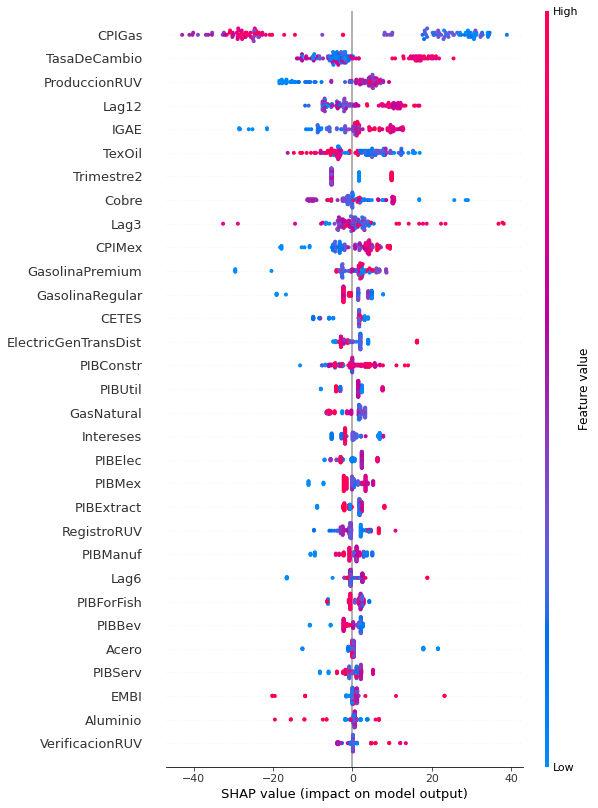

In [0]:
import shap
from sklearn.linear_model import LinearRegression

# quitando columnas no deseadas
X = df.drop(['DQUA', 'YEAR', 'MONTH', 'Trimestre'], axis = 1)

# columna a predecir
y = df['DQUA']

X100 = shap.utils.sample(X, 100)

model = LinearRegression()
model.fit(X, y)

import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

shap.plots.beeswarm(shap_values_ebm, max_display=32)

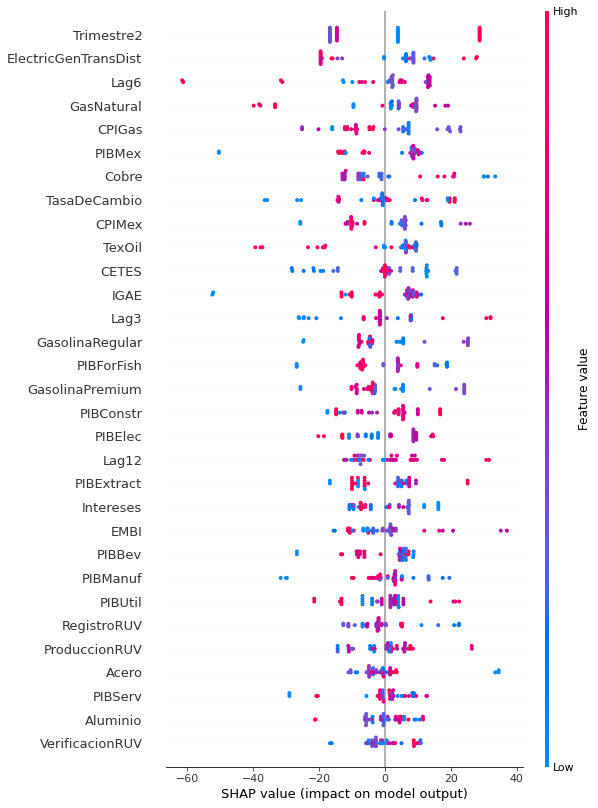

In [0]:
import shap
from sklearn.linear_model import LinearRegression

# quitando columnas no deseadas
X = df2.drop(['DQUA', 'YEAR', 'Trimestre'], axis = 1)

# columna a predecir
y = df2['DQUA']

X100 = shap.utils.sample(X, 100)

model = LinearRegression()
model.fit(X, y)

import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

shap.plots.beeswarm(shap_values_ebm, max_display=32)

Permutation explainer: 31%|███ | 39/126 [00:00<?, ?it/s]Permutation explainer: 33%|███▎ | 41/126 [00:10<00:11, 7.22it/s]Permutation explainer: 33%|███▎ | 42/126 [00:10<00:16, 5.06it/s]Permutation explainer: 34%|███▍ | 43/126 [00:11<00:18, 4.39it/s]Permutation explainer: 35%|███▍ | 44/126 [00:11<00:20, 4.06it/s]Permutation explainer: 36%|███▌ | 45/126 [00:11<00:21, 3.85it/s]Permutation explainer: 37%|███▋ | 46/126 [00:11<00:21, 3.75it/s]Permutation explainer: 37%|███▋ | 47/126 [00:12<00:21, 3.71it/s]Permutation explainer: 38%|███▊ | 48/126 [00:12<00:21, 3.69it/s]Permutation explainer: 39%|███▉ | 49/126 [00:12<00:20, 3.68it/s]Permutation explainer: 40%|███▉ | 50/126 [00:13<00:20, 3.64it/s]Permutation explainer: 40%|████ | 51/126 [00:13<00:20, 3.60it/s]Permutation explainer: 41%|████▏ | 52/126 [00:13<00:20, 3.53it/s]Permutation explainer: 42%|████▏ | 53/126 [00:13<00:20, 3.53it/s]Permutation explainer: 43%|████▎ | 54/126 [00:14<00:20, 3.55it/s]Permutation explainer: 44%|████▎ | 55/126 [00:14<00:19, 3.57it/s]Permutation explainer: 44%|████▍ | 56/126 [00:14<00:19, 3.57it/s]Permutation explainer: 45%|████▌ | 57/126 [00:15<00:19, 3.57it/s]Permutation explainer: 46%|████▌ | 58/126 [00:15<00:19, 3.56it/s]Permutation explainer: 47%|████▋ | 59/126 [00:15<00:18, 3.59it/s]Permutation explainer: 48%|████▊ | 60/126 [00:15<00:18, 3.63it/s]Permutation explainer: 48%|████▊ | 61/126 [00:16<00:17, 3.63it/s]Permutation explainer: 49%|████▉ | 62/126 [00:16<00:17, 3.58it/s]Permutation explainer: 50%|█████ | 63/126 [00:16<00:17, 3.56it/s]Permutation explainer: 51%|█████ | 64/126 [00:16<00:17, 3.55it/s]Permutation explainer: 52%|█████▏ | 65/126 [00:17<00:17, 3.56it/s]Permutation explainer: 52%|█████▏ | 66/126 [00:17<00:16, 3.57it/s]Permutation explainer: 53%|█████▎ | 67/126 [00:17<00:16, 3.59it/s]Permutation explainer: 54%|█████▍ | 68/126 [00:18<00:16, 3.59it/s]Permutation explainer: 55%|█████▍ | 69/126 [00:18<00:15, 3.59it/s]Permutation explainer: 56%|█████▌ | 70/126 [00:18<00:15, 3.58it/s]Permutation explainer: 56%|█████▋ | 71/126 [00:18<00:15, 3.60it/s]Permutation explainer: 57%|█████▋ | 72/126 [00:19<00:14, 3.61it/s]Permutation explainer: 58%|█████▊ | 73/126 [00:19<00:14, 3.60it/s]Permutation explainer: 59%|█████▊ | 74/126 [00:19<00:14, 3.58it/s]Permutation explainer: 60%|█████▉ | 75/126 [00:20<00:14, 3.57it/s]Permutation explainer: 60%|██████ | 76/126 [00:20<00:14, 3.57it/s]Permutation explainer: 61%|██████ | 77/126 [00:20<00:13, 3.57it/s]Permutation explainer: 62%|██████▏ | 78/126 [00:20<00:13, 3.55it/s]Permutation explainer: 63%|██████▎ | 79/126 [00:21<00:13, 3.56it/s]Permutation explainer: 63%|██████▎ | 80/126 [00:21<00:13, 3.53it/s]Permutation explainer: 64%|██████▍ | 81/126 [00:21<00:12, 3.55it/s]Permutation explainer: 65%|██████▌ | 82/126 [00:22<00:12, 3.56it/s]Permutation explainer: 66%|██████▌ | 83/126 [00:22<00:12, 3.57it/s]Permutation explainer: 67%|██████▋ | 84/126 [00:22<00:11, 3.60it/s]Permutation explainer: 67%|██████▋ | 85/126 [00:22<00:11, 3.62it/s]Permutation explainer: 68%|██████▊ | 86/126 [00:23<00:11, 3.60it/s]Permutation explainer: 69%|██████▉ | 87/126 [00:23<00:10, 3.57it/s]Permutation explainer: 70%|██████▉ | 88/126 [00:23<00:10, 3.56it/s]Permutation explainer: 71%|███████ | 89/126 [00:23<00:10, 3.64it/s]Permutation explainer: 71%|███████▏ | 90/126 [00:24<00:09, 3.77it/s]Permutation explainer: 72%|███████▏ | 91/126 [00:24<00:09, 3.81it/s]Permutation explainer: 73%|███████▎ | 92/126 [00:24<00:08, 3.82it/s]Permutation explainer: 74%|███████▍ | 93/126 [00:24<00:08, 3.87it/s]Permutation explainer: 75%|███████▍ | 94/126 [00:25<00:08, 3.90it/s]Permutation explainer: 75%|███████▌ | 95/126 [00:25<00:07, 3.93it/s]Permutation explainer: 76%|███████▌ | 96/126 [00:25<00:07, 3.96it/s]Permutation explainer: 77%|███████▋ | 97/126 [00:25<00:07, 3.98it/s]Permutation explainer: 78%|███████▊ | 98/126 [00:26<00:07, 3.97it/s]Permutation explainer: 79%|███████▊ | 99/126 [00:26<00:06, 3.9

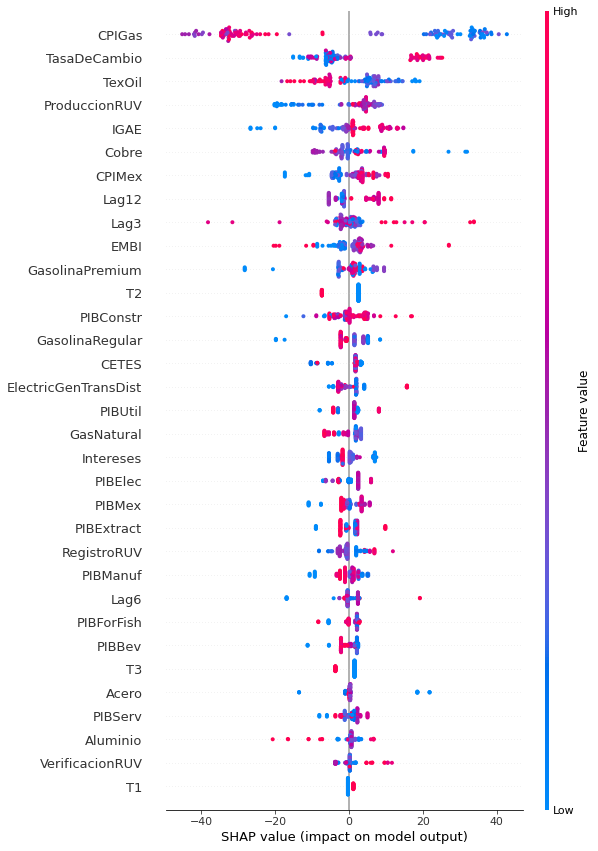

In [0]:
import shap
from sklearn.linear_model import LinearRegression

# quitando columnas no deseadas
X = df3.drop(['DQUA', 'YEAR', 'MONTH'], axis = 1)

# columna a predecir
y = df3['DQUA']

X100 = shap.utils.sample(X, 100)

model = LinearRegression()
model.fit(X, y)

import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

shap.plots.beeswarm(shap_values_ebm, max_display=33)

In [0]:
# lo requerido para correr el modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# escogemos las columnas que no queremos usar para predecir en el modelo
x = df.drop(['DQUA', 'YEAR', 'MONTH', 'Trimestre', 'GasolinaRegular', 'Intereses', 'Acero', 'PIBForFish', 'PIBBev', 'PIBServ', 'Aluminio', 'CPIGas', 'ProduccionRUV', 'Lag3'], axis=1)

# se escoge la columna que queremos predecir
y = df['DQUA']

# hacer el split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# se crea una instancia del modelo
LR = LinearRegression()

# hacemos un fit con la training data
LR.fit(x_train, y_train)

# se hacen predicciones en los datos de prueba
y_prediction =  LR.predict(x_test)

# encontramos las métricas de evaluación de modelo. estas mismas métricas están en los comentarios de cada prueba de modelo en esta misma celda
r2=r2_score(y_test,y_prediction)
MAE = mean_absolute_error(y_test, y_prediction)
print('R2: ',r2)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('MAE: '+ str(MAE))

R2: 0.1834288062922803
RMSE: 113.63446172469139
MAE: 85.82388829684956

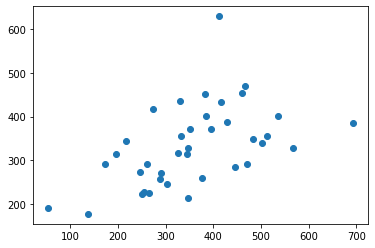

In [0]:
# aquí vemos la relación entre el valor real y la predicción
import matplotlib.pyplot as plt
plt.scatter(y_test, y_prediction);

In [0]:
# lo requerido para el modelo
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# separate data into variables and predictions
X = df.drop(['DQUA', 'YEAR', 'MONTH', 'Trimestre', 'GasolinaRegular', 'Intereses', 'Acero', 'PIBForFish', 'PIBBev', 'PIBServ', 'Aluminio', 'CPIGas', 'ProduccionRUV', 'Lag3'], axis=1)
y = df['DQUA']

# split data into training and testing sets
seed = 42
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# fit the model on the training data
XGBmodel = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
XGBmodel.fit(X_train, y_train)

# make predictions for test data
y_prediction = XGBmodel.predict(X_test)

# evaluate predictions
r2 = r2_score(y_test,y_prediction)
rmse = np.sqrt(mean_squared_error(y_test, y_prediction))
MAE = mean_absolute_error(y_test, y_prediction)

print('R2: ',r2)
print("RMSE: %f" % (rmse))
print('MAE: '+ str(MAE))

R2: -0.36950974501893463
RMSE: 147.161971
MAE: 109.32864138954564

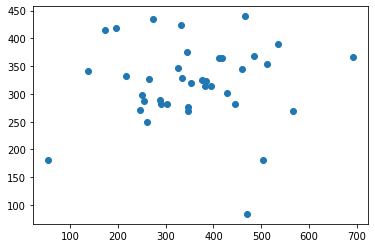

In [0]:
# ver relación entre valor predecido y valor real
from matplotlib import pyplot as plt
plt.scatter(y_test, y_prediction);

In [0]:
# lo requerido para el modelo
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# escoger columnas que no queremos usar como predictores
X = df.drop(['DQUA', 'YEAR', 'MONTH', 'Trimestre', 'GasolinaRegular', 'Intereses', 'Acero', 'PIBForFish', 'PIBBev', 'PIBServ', 'Aluminio', 'CPIGas', 'ProduccionRUV', 'Lag3'], axis=1)

# escoger columna para predecir
y = df['DQUA']

# crear instancia de los polynomial features
polynomial_converter = PolynomialFeatures(degree=1, include_bias=False)

# hacer un fit de las variabeles polinomiales
polynomial_converter.fit(X)

# transformar los datos a polinomiales
polyfeatures = polynomial_converter.transform(X)

# hacer el split de los datos
X_train, X_test, y_train, y_test = train_test_split(polyfeatures, y, test_size=0.3, random_state=42)

# crear instancia del modelo
model = LinearRegression()

# hacer fit al modelo
model.fit(X_train, y_train)

# assign predictions to a variable
y_prediction = model.predict(X_test)

# get the metrics
MAE = mean_absolute_error(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_prediction)

print('MAE: '+ str(MAE))
print('RMSE: '+ str(RMSE))
print('R2: ' + str(R2))

MAE: 85.82388829685597
RMSE: 113.63446172469843
R2: 0.18342880629217917

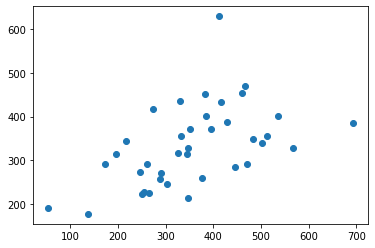

In [0]:
# ver la relación entre valor predecido y valor real
from matplotlib import pyplot as plt
plt.scatter(y_test, y_prediction);

In [0]:
# lo requerido para correr el modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# escogemos las columnas que no queremos usar para predecir en el modelo
#x = df2.drop(['DQUA', 'YEAR', 'Trimestre', 'GasolinaRegular', 'Intereses', 'Acero', 'PIBUtil','PIBForFish', 'PIBBev', 'PIBServ', 'Aluminio', 'CPIMex', 'ProduccionRUV', 'Lag3'], axis=1)
x=df2[['Trimestre2','ElectricGenTransDist','GasNatural','Lag6','CPIGas','Cobre','TasaDeCambio','CPIMex','TexOil','CETES','Lag3','PIBConstr','PIBElec','EMBI','RegistroRUV','PIBManuf','Aluminio','Lag12']]

# se escoge la columna que queremos predecir
y = df2['DQUA']

# hacer el split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# se crea una instancia del modelo
LR = LinearRegression()

# hacemos un fit con la training data
LR.fit(x_train, y_train)

# se hacen predicciones en los datos de prueba
y_prediction =  LR.predict(x_test)

# encontramos las métricas de evaluación de modelo. estas mismas métricas están en los comentarios de cada prueba de modelo en esta misma celda
r2=r2_score(y_test,y_prediction)
MAE = mean_absolute_error(y_test, y_prediction)
print('R2: ',r2)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('MAE: '+ str(MAE))

R2: -0.6359614917255212
RMSE: 314.02279920928675
MAE: 267.25827848341396

Out[17]:

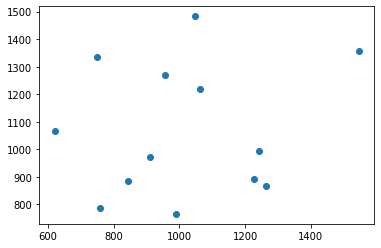

<matplotlib.collections.PathCollection at 0x7f20f5e56670>

In [0]:
plt.scatter(y_test, y_prediction)

In [0]:
# lo requerido para el modelo
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# escoger variables que no queremos usar
X = df2.drop(['DQUA', 'YEAR', 'Trimestre', 'GasolinaRegular', 'Intereses', 'Acero', 'PIBForFish', 'PIBBev', 'PIBServ', 'Aluminio', 'CPIGas', 'ProduccionRUV', 'Lag3'], axis=1)

# escoger columna a predecir
y = df2['DQUA']

# crear instancia de los polynomial features
polynomial_converter = PolynomialFeatures(degree=1, include_bias=False)

# hacer un fit en la instancia
polynomial_converter.fit(X)

# transformar las columnas a polynomial features
polyfeatures = polynomial_converter.transform(X)

# hacer el split
X_train, X_test, y_train, y_test = train_test_split(polyfeatures, y, test_size=0.3, random_state=42)

# crear isntancia del modelo
model = LinearRegression()

# hacer fit del modelo
model.fit(X_train, y_train)

# asignar predicciones
y_predictions = model.predict(X_test)

# conseguir las métricas de error
MAE = mean_absolute_error(y_test, y_predictions)
MSE = mean_squared_error(y_test, y_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_predictions)

print('MAE: '+ str(MAE))
print('RMSE: '+ str(RMSE))
print('R2: ' + str(R2))

MAE: 474.29308227656696
RMSE: 573.3832343144225
R2: -4.454321025727192

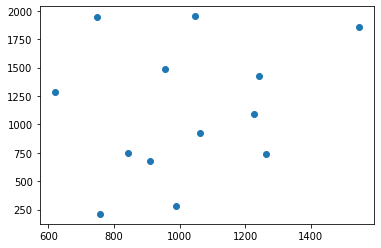

In [0]:
# ver la relación entre valor predecido y valor real
from matplotlib import pyplot as plt
plt.scatter(y_test, y_predictions);

In [0]:
df3.corr()['DQUA'].sort_values(ascending=False)

Out[20]: DQUA 1.000000
Lag3 0.329772
Lag12 0.288375
ProduccionRUV 0.209819
Lag6 0.208159
MONTH 0.203194
PIBConstr 0.200473
VerificacionRUV 0.154064
RegistroRUV 0.137773
IGAE 0.129289
PIBMex 0.119596
PIBManuf 0.119105
PIBExtract 0.111761
PIBServ 0.068039
PIBForFish 0.038247
T1 0.036348
PIBElec 0.035569
PIBUtil 0.034237
TasaDeCambio 0.034046
EMBI 0.008152
PIBBev -0.024251
GasolinaRegular -0.030053
YEAR -0.030346
CPIMex -0.036002
ElectricGenTransDist -0.045845
CPIGas -0.048968
GasolinaPremium -0.052751
T3 -0.061150
Acero -0.126681
TexOil -0.135252
GasNatural -0.143416
CETES -0.180696
Intereses -0.195331
Cobre -0.198030
Aluminio -0.230472
T2 -0.257169
Name: DQUA, dtype: float64

In [0]:
# lo requerido para correr el modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# escogemos las columnas que no queremos usar para predecir en el modelo
x = df3.drop(['DQUA', 'YEAR', 'MONTH', 'GasolinaRegular', 'Intereses', 'Acero', 'PIBForFish', 'PIBBev', 'PIBServ', 'Aluminio', 'CPIGas', 'ProduccionRUV', 'T1', 'T3','Lag3'], axis=1)

# se escoge la columna que queremos predecir
y = df3['DQUA']

# hacer el split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# se crea una instancia del modelo
LR = LinearRegression()

# hacemos un fit con la training data
LR.fit(x_train, y_train)

# se hacen predicciones en los datos de prueba
y_prediction =  LR.predict(x_test)

# encontramos las métricas de evaluación de modelo. estas mismas métricas están en los comentarios de cada prueba de modelo en esta misma celda
r2=r2_score(y_test,y_prediction)
MAE = mean_absolute_error(y_test, y_prediction)
print('R2: ',r2)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('MAE: '+ str(MAE))

R2: 0.22147686022879198
RMSE: 110.95548962597678
MAE: 82.58843181329085

Out[22]:

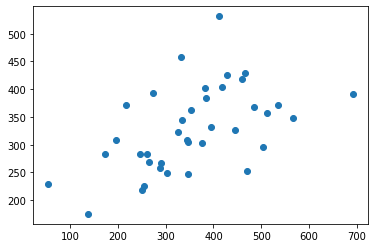

<matplotlib.collections.PathCollection at 0x7f20f5ca2f70>

In [0]:
plt.scatter(y_test, y_prediction)

In [0]:
# lo requerido para el modelo
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# escoger columnas que no queremos usar como predictores
X = df3.drop(['DQUA', 'YEAR', 'MONTH', 'GasolinaRegular', 'Intereses', 'Acero', 'PIBForFish', 'PIBBev', 'PIBServ', 'Aluminio', 'CPIGas', 'ProduccionRUV', 'Lag3', 'T1', 'T3'], axis=1)

# escoger columna para predecir
y = df3['DQUA']

# crear instancia de los polynomial features
polynomial_converter = PolynomialFeatures(degree=1, include_bias=False)

# hacer un fit de las variabeles polinomiales
polynomial_converter.fit(X)

# transformar los datos a polinomiales
polyfeatures = polynomial_converter.transform(X)

# hacer el split de los datos
X_train, X_test, y_train, y_test = train_test_split(polyfeatures, y, test_size=0.3, random_state=42)

# crear instancia del modelo
model = LinearRegression()

# hacer fit al modelo
model.fit(X_train, y_train)

# assign predictions to a variable
y_prediction = model.predict(X_test)

# get the metrics
MAE = mean_absolute_error(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_prediction)
MAPE = mean_absolute_percentage_error(y_test, y_prediction)

print('MAE: '+ str(MAE))
print('RMSE: '+ str(RMSE))
print('R2: ' + str(R2))
print('MAPE: ' + str(MAPE))

MAE: 82.58843181329425
RMSE: 110.95548962596736
R2: 0.2214768602289242
MAPE: 0.300036862833781

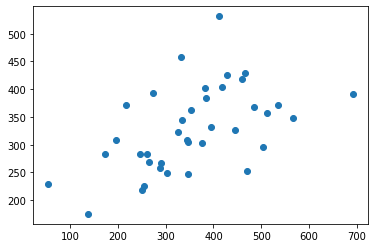

In [0]:
# ver la relación entre valor predecido y valor real
from matplotlib import pyplot as plt
plt.scatter(y_test, y_prediction);

Feature 0: 0.111254
Feature 1: 1.256833
Feature 2: 3.818837
Feature 3: 1.192412
Feature 4: 3.504958
Feature 5: 0.770409
Feature 6: 1.120882
Feature 7: 1.453500
Feature 8: 5.297582
Feature 9: 5.037806
Feature 10: 1.669019
Feature 11: 0.569792
Feature 12: 6.542154
Feature 13: 0.392360
Feature 14: 1.512155
Feature 15: 0.738838
Feature 16: 1.314237
Feature 17: 7.475157
Feature 18: 1.166745
Feature 19: 0.011606
Feature 20: 5.820387
Feature 21: 2.655724
Feature 22: 1.199144
Feature 23: 0.977604
Feature 24: 0.034565
Feature 25: 0.035124
Feature 26: 0.167133
Feature 27: 8.190297
Feature 28: 5.275944
Feature 29: 15.776835
Feature 30: 2.874964

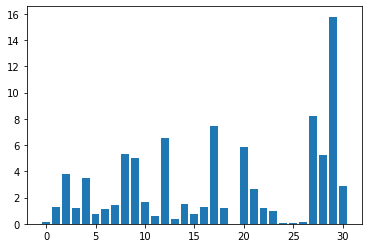

In [0]:
from matplotlib import pyplot as plt
# separate data into variables and predictions
X = df.drop(['DQUA', 'YEAR', 'MONTH', 'Trimestre'], axis=1)
y = df['DQUA']

# split data into training and testing sets
seed = 42
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [0]:
X = df.drop(['DQUA', 'YEAR', 'MONTH', 'Trimestre'], axis=1)
y = df['DQUA']

# split
seed = 42
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
  
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 101.487

Feature 0: 0.091978
Feature 1: 0.049504
Feature 2: 0.007917
Feature 3: 0.032581
Feature 4: 0.013682
Feature 5: 0.185966
Feature 6: 0.182868
Feature 7: 0.097810
Feature 8: 0.097982
Feature 9: 0.025109
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.053691
Feature 14: 0.152005
Feature 15: 0.000000
Feature 16: 0.038627
Feature 17: 0.020279
Feature 18: 0.059477
Feature 19: 0.157037
Feature 20: 0.020818
Feature 21: 0.085246
Feature 22: 0.000000
Feature 23: 0.125651
Feature 24: 0.085248
Feature 25: 0.078296
Feature 26: 0.005441
Feature 27: 0.000000
Feature 28: 0.000000
Feature 29: 0.044487
Feature 30: 0.247435

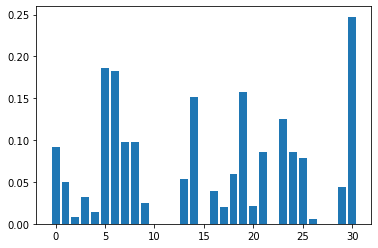

In [0]:
# configure to select all features
from sklearn.feature_selection import mutual_info_regression
fs = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [0]:
X = df.drop(['DQUA', 'YEAR', 'MONTH', 'Trimestre'], axis=1)
y = df['DQUA']

# split
seed = 42
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
  
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 94.739

In [0]:
# escoger columnas que no queremos usar como predictores
X = df.drop(['DQUA', 'YEAR', 'MONTH', 'Trimestre', 'GasolinaRegular', 'Intereses', 'Acero', 'PIBForFish', 'PIBBev', 'PIBServ', 'Aluminio', 'CPIGas', 'ProduccionRUV', 'Lag3'], axis=1)
# escoger columna para predecir
y = df['DQUA']
# crear instancia de los polynomial features
polynomial_converter = PolynomialFeatures(degree=1, include_bias=False)
# hacer un fit de las variabeles polinomiales
polynomial_converter.fit(X)
# transformar los datos a polinomiales
polyfeatures = polynomial_converter.transform(X)
# hacer el split de los datos
X_train, X_test, y_train, y_test = train_test_split(polyfeatures, y, test_size=0.3, random_state=42)
# crear instancia del modelo
model = LinearRegression()
# hacer fit al modelo
model.fit(X_train, y_train)
# assign predictions to a variable
y_prediction = model.predict(X_test)


polyfeatures = PolynomialFeatures(degree=1, include_bias=False)
X_poly = polyfeatures.fit_transform(X)
model = LinearRegression()
#print(np.mean(cross_val_score(poly, X_poly, Y, cv=5)))

from sklearn.model_selection import cross_val_score
cross_val_score(model, X_poly, y, cv=10)

Out[29]: array([ 0.32538367, -0.36919311, -0.88762225, -0.42965458, -0.28468546,
 -0.29044383, -1.0267349 , -0.02552285, -1.89950788, -0.31148715])

In [0]:
MXPAD11 = [21763]
MXPAD12 = [23035]
MXPAD13 = [23449]
MXPAD14 = [24039]
MXPAD15 = [24552]
MXPAD16 = [23748]
MXPAD17 = [17894]
MXPAD18 = [17946]
MXPAD19 = [15638]
MXPAD20 = [13841]
MXPAD21 = [7893]

MXPAD11 = MXPAD11*12
MXPAD12 = MXPAD12*12
MXPAD13 = MXPAD13*12
MXPAD14 = MXPAD14*12
MXPAD15 = MXPAD15*12
MXPAD16 = MXPAD16*12
MXPAD17 = MXPAD17*12
MXPAD18 = MXPAD18*12
MXPAD19 = MXPAD19*12
MXPAD20 = MXPAD20*12
MXPAD21 = MXPAD21*6

MXPAD = MXPAD11 + MXPAD12 + MXPAD13 + MXPAD14 + MXPAD15 + MXPAD16 + MXPAD17 + MXPAD18 + MXPAD19 + MXPAD20 + MXPAD21

In [0]:
df4 = df
# porcentaje de ratio tomando todos los meses agrupados y dividiendo por cantidad total vendida
mylist = list((df.groupby('MONTH').sum()['DQUA'] / df['DQUA'].sum()))
# multiplicar para tener la misma cantidad de años
mylist2 = mylist*10
# agregarle los 6 meses de final de la tabla
mylist3 = mylist2 + mylist[0:6]
# agregar la columna de porcentaje promedio por mes con todos los años
df4['%meanYear'] = mylist3

In [0]:
# agrupar por año y mantener el año como índice
years_sum = df.groupby('YEAR').sum()['DQUA'].reset_index()
# conseguir el dqua del año
years_sum[years_sum['YEAR']==2011]['DQUA']
# agrupar por año para tener suma de dqua
a = df.groupby(['YEAR']).agg(DQUA_2=('DQUA','sum'))
# unir las sumas con el df
df4 = df.join(a,on='YEAR')
# crear columna de porcentaje por mes por año
df4['%porYear'] = (df4['DQUA'] / df4['DQUA_2'])
# quitar la columna de dqua_2 que habíamos creado
df4.drop('DQUA_2',axis=1,inplace=True)

In [0]:
# agregar columna de TAM para poder dividir
df4['TAM'] = MXPAD

In [0]:
# ver resultado final
df4['TAM1PromMesGlob'] = (df4['TAM'] * df4['%meanYear']).round()
df4['TAM2PromMesAn'] = (df4['TAM'] * df4['%porYear']).round()

In [0]:
# tabla final con las cantidades de TAM
df5 = df4.drop(['TAM', '%meanYear', '%porYear'],axis=1)
df5.head()

Out[35]:

,YEAR,MONTH,DQUA,TasaDeCambio,CPIMex,Intereses,IGAE,CETES,GasolinaRegular,GasolinaPremium,CPIGas,Cobre,Aluminio,TexOil,GasNatural,Acero,EMBI,ElectricGenTransDist,RegistroRUV,VerificacionRUV,ProduccionRUV,PIBMex,PIBForFish,PIBConstr,PIBExtract,PIBManuf,PIBBev,PIBUtil,PIBElec,PIBServ,Lag12,Lag6,Lag3,Trimestre,Trimestre2,TAM1PromMesGlob,TAM2PromMesAn
0,2011,1,54.0,12.1,75.3,4.9,93.4,4.1,8.84,10.14,53.6,9555.0,2439.0,89.4,4.5,728.2,130.6,73.9,25395.27,22263.97,20575.54,86.06,2.72,6.51,4.04,15.26,3.88,1.32,1.02,51.55,73.0,63.0,89.0,T1,1,1805.0,403.0
1,2011,2,86.0,12.1,75.6,4.9,93.5,4.0,8.92,10.18,53.9,9867.0,2508.0,89.6,4.1,810.2,133.0,74.8,25193.89,22052.76,20575.13,86.06,2.72,6.51,4.04,15.26,3.88,1.32,1.02,51.55,73.0,38.0,167.0,T1,1,1776.0,641.0
2,2011,3,169.0,12.0,75.7,4.9,94.1,4.3,9.00,10.22,54.4,9530.0,2552.0,102.9,4.0,873.0,132.0,76.0,25060.77,21933.48,20508.80,86.06,2.72,6.51,4.04,15.26,3.88,1.32,1.02,51.55,92.0,107.0,112.0,T1,1,2241.0,1260.0
3,2011,4,55.0,11.7,75.7,4.9,93.6,4.3,9.08,10.26,55.0,9483.0,2662.0,110.0,4.2,847.0,134.1,73.0,25000.70,21876.70,20415.99,86.51,2.52,6.73,4.08,15.21,3.89,1.34,1.03,51.73,41.0,89.0,54.0,T2,2,1814.0,410.0
4,2011,5,138.0,11.7,75.2,4.9,94.5,4.3,9.16,10.30,55.2,8926.0,2592.0,101.3,4.3,789.6,140.7,71.6,24881.67,21755.70,20344.41,86.51,2.52,6.73,4.08,15.21,3.89,1.34,1.03,51.73,98.0,167.0,86.0,T2,2,1566.0,1029.0


In [0]:
# lo requerido para correr el modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# escogemos las variables del modelo
x = df5[['CPIMex', 'CETES', 'TexOil', 'GasNatural', 'EMBI', 'ElectricGenTransDist', 'ProduccionRUV', 'PIBManuf', 'PIBElec', 'Trimestre2']]

# se escoge la columna que queremos predecir
#y = df5['TAM2PromMesAn']
y = df5['TAM1PromMesGlob']

# hacer el split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# se crea una instancia del modelo
LR = LinearRegression()

# hacemos un fit con la training data
LR.fit(x_train, y_train)

# se hacen predicciones en los datos de prueba
y_prediction =  LR.predict(x_test)

# encontramos las métricas de evaluación de modelo. estas mismas métricas están en los comentarios de cada prueba de modelo en esta misma celda
r2=r2_score(y_test,y_prediction)
MAE = mean_absolute_error(y_test, y_prediction)
MAPE = mean_absolute_percentage_error(y_test, y_prediction)
print('R2: ',r2)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('MAE: '+ str(MAE))
print('MAPE: ' + str(MAPE*100))

R2: 0.7337717546855306
RMSE: 221.3918860833209
MAE: 172.31740183303532
MAPE: 11.205476205511463

In [0]:
LR.coef_

Out[37]: array([-7.61186231e+01, -6.72182299e+01, -9.74410939e+00, -5.32403170e+01,
 -1.10524141e+00, 3.18675050e+01, 1.36098372e-02, 6.38742772e+01,
 1.77277954e+03, 5.44368937e+01])

Out[38]:

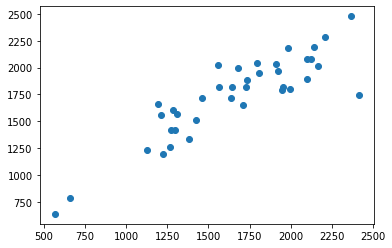

<matplotlib.collections.PathCollection at 0x7f20ca6e4f70>

In [0]:
plt.scatter(y_test, y_prediction)

In [0]:
# lo requerido para correr el modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# escogemos las columnas que no queremos usar para predecir en el modelo
x = df5[['ProduccionRUV', 'PIBConstr', 'RegistroRUV']]

# se escoge la columna que queremos predecir
#y = df5['TAM2PromMesAn']
y = df5['TAM1PromMesGlob']

# hacer el split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# se crea una instancia del modelo
LR = LinearRegression()

# hacemos un fit con la training data
LR.fit(x_train, y_train)

# se hacen predicciones en los datos de prueba
y_prediction =  LR.predict(x_test)

# encontramos las métricas de evaluación de modelo. estas mismas métricas están en los comentarios de cada prueba de modelo en esta misma celda
r2=r2_score(y_test,y_prediction)
MAE = mean_absolute_error(y_test, y_prediction)
MAPE = mean_absolute_percentage_error(y_test, y_prediction)
print('R2: ',r2)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('MAE: '+ str(MAE))
print('MAPE: ' + str(MAPE*100))

R2: 0.3543625633752846
RMSE: 344.769617880732
MAE: 269.643301922792
MAPE: 19.575750266843848

Out[40]:

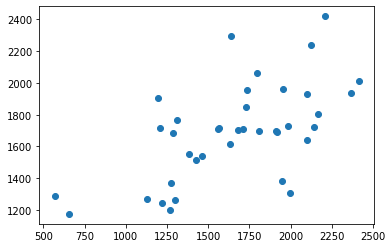

<matplotlib.collections.PathCollection at 0x7f20c844f160>

In [0]:
plt.scatter(y_test, y_prediction)

In [0]:
df6 = df5.drop(['Trimestre', 'YEAR', 'MONTH', 'TAM1PromMesGlob', 'TAM2PromMesAn', 'DQUA'], axis=1)
from sklearn.preprocessing import MaxAbsScaler
abs_scaler = MaxAbsScaler()
abs_scaler.fit(df6)
scaled_data = abs_scaler.transform(df6)
dfScaled = pd.DataFrame(scaled_data, columns = df6.columns)
dfScaled['YEAR'] = df5['YEAR']
dfScaled['MONTH'] = df5['MONTH']
dfScaled['TAM1PromMesGlob'] = df5['TAM1PromMesGlob']
dfScaled['TAM2PromMesAn'] = df5['TAM2PromMesAn']
dfScaled['DQUA'] = df5['DQUA']
dfScaled = dfScaled[['YEAR', 'MONTH', 'DQUA', 'TAM1PromMesGlob', 'TAM2PromMesAn', 'TasaDeCambio', 'CPIMex', 'Intereses', 'IGAE', 'CETES', 'GasolinaRegular', 'GasolinaPremium', 'CPIGas', 'Cobre', 'Aluminio', 'TexOil', 'GasNatural',	'Acero', 'EMBI', 'ElectricGenTransDist', 'RegistroRUV', 'VerificacionRUV', 'ProduccionRUV',	'PIBMex', 'PIBForFish',	'PIBConstr', 'PIBExtract', 'PIBManuf', 'PIBBev', 'PIBUtil', 'PIBElec', 'PIBServ', 'Lag12', 'Lag6', 'Lag3', 'Trimestre2']]

In [0]:
dfScaled.head()

Out[43]:

,YEAR,MONTH,DQUA,TAM1PromMesGlob,TAM2PromMesAn,TasaDeCambio,CPIMex,Intereses,IGAE,CETES,GasolinaRegular,GasolinaPremium,CPIGas,Cobre,Aluminio,TexOil,GasNatural,Acero,EMBI,ElectricGenTransDist,RegistroRUV,VerificacionRUV,ProduccionRUV,PIBMex,PIBForFish,PIBConstr,PIBExtract,PIBManuf,PIBBev,PIBUtil,PIBElec,PIBServ,Lag12,Lag6,Lag3,Trimestre2
0,2011,1,54.0,1805.0,403.0,0.500000,0.666372,0.569767,0.822907,0.493976,0.435468,0.458824,0.424386,0.938236,0.916228,0.812727,0.750000,0.437804,0.327154,0.678604,0.301474,0.249904,0.629491,0.821968,0.770538,0.865691,0.973494,0.819109,0.810021,0.809816,0.790698,0.788106,0.105491,0.091040,0.128613,0.25
1,2011,2,86.0,1776.0,641.0,0.500000,0.669027,0.569767,0.823789,0.481928,0.439409,0.460633,0.426762,0.968873,0.942149,0.814545,0.683333,0.487104,0.333166,0.686869,0.299083,0.247534,0.629478,0.821968,0.770538,0.865691,0.973494,0.819109,0.810021,0.809816,0.790698,0.788106,0.105491,0.054913,0.241329,0.25
2,2011,3,169.0,2241.0,1260.0,0.495868,0.669912,0.569767,0.829075,0.518072,0.443350,0.462443,0.430721,0.935782,0.958678,0.935455,0.666667,0.524860,0.330661,0.697888,0.297503,0.246195,0.627449,0.821968,0.770538,0.865691,0.973494,0.819109,0.810021,0.809816,0.790698,0.788106,0.132948,0.154624,0.161850,0.25
3,2011,4,55.0,1814.0,410.0,0.483471,0.669912,0.569767,0.824670,0.518072,0.447291,0.464253,0.435471,0.931167,1.000000,1.000000,0.700000,0.509229,0.335922,0.670340,0.296790,0.245557,0.624610,0.826266,0.713881,0.894947,0.983133,0.816425,0.812109,0.822086,0.798450,0.790858,0.059249,0.128613,0.078035,0.50
4,2011,5,138.0,1566.0,1029.0,0.483471,0.665487,0.569767,0.832599,0.518072,0.451232,0.466063,0.437055,0.876473,0.973704,0.920909,0.716667,0.474719,0.352455,0.657484,0.295377,0.244199,0.622420,0.826266,0.713881,0.894947,0.983133,0.816425,0.812109,0.822086,0.798450,0.790858,0.141618,0.241329,0.124277,0.50


In [0]:
# lo requerido para correr el modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# escogemos las variables del modelo
x = dfScaled[['CPIMex', 'CETES', 'TexOil', 'GasNatural', 'EMBI', 'ElectricGenTransDist', 'ProduccionRUV', 'PIBManuf', 'PIBElec', 'Trimestre2']]

# se escoge la columna que queremos predecir
#y = df5['TAM2PromMesAn']
y = dfScaled['TAM1PromMesGlob']

# hacer el split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# se crea una instancia del modelo
LR = LinearRegression()

# hacemos un fit con la training data
LR.fit(x_train, y_train)

# se hacen predicciones en los datos de prueba
y_prediction =  LR.predict(x_test)

# encontramos las métricas de evaluación de modelo. estas mismas métricas están en los comentarios de cada prueba de modelo en esta misma celda
r2=r2_score(y_test,y_prediction)
MAE = mean_absolute_error(y_test, y_prediction)
MAPE = mean_absolute_percentage_error(y_test, y_prediction)
print('R2: ',r2)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('MAE: '+ str(MAE))
print('MAPE: ' + str(MAPE*100))

R2: 0.73377175468551
RMSE: 221.3918860833295
MAE: 172.317401833042
MAPE: 11.20547620551244

Out[45]:

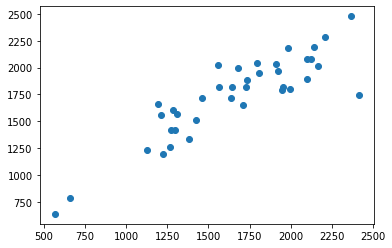

<matplotlib.collections.PathCollection at 0x7f20c83bde80>

In [0]:
plt.scatter(y_test, y_prediction)

In [0]:
LR.coef_

Out[46]: array([-8601.40441232, -557.91130799, -1071.85203323, -319.44190212,
 -441.21237098, 3470.37129001, 444.85113828, 1189.9777836 ,
 2286.88560531, 217.74757463])

Out[47]:

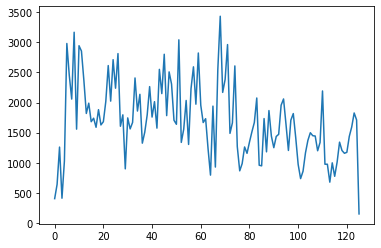

[<matplotlib.lines.Line2D at 0x7f20f5baee80>]

In [0]:
plt.plot(df5['TAM2PromMesAn'])

Out[48]:

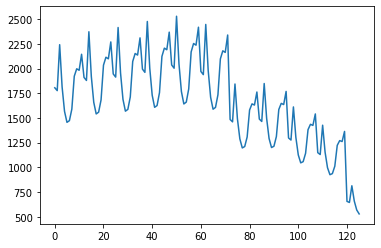

[<matplotlib.lines.Line2D at 0x7f20f5d538e0>]

In [0]:
plt.plot(df5['TAM1PromMesGlob'])

In [0]:
def pand(df):
  if df['YEAR'] > 2019:
    return 1
  else:
    return 0
  
df5['Pandemia'] = df5.apply(pand,axis=1)

In [0]:
df6 = df5.drop(['Trimestre', 'YEAR', 'MONTH', 'TAM1PromMesGlob', 'TAM2PromMesAn', 'DQUA','Pandemia'], axis=1)
from sklearn.preprocessing import MaxAbsScaler
abs_scaler = MaxAbsScaler()
abs_scaler.fit(df6)
scaled_data = abs_scaler.transform(df6)
dfScaled = pd.DataFrame(scaled_data, columns = df6.columns)
dfScaled['YEAR'] = df5['YEAR']
dfScaled['MONTH'] = df5['MONTH']
dfScaled['TAM1PromMesGlob'] = df5['TAM1PromMesGlob']
dfScaled['TAM2PromMesAn'] = df5['TAM2PromMesAn']
dfScaled['DQUA'] = df5['DQUA']
dfScaled['Pandemia'] = df5['Pandemia']
dfScaled = dfScaled[['YEAR', 'MONTH', 'DQUA', 'TAM1PromMesGlob', 'TAM2PromMesAn', 'TasaDeCambio', 'CPIMex', 'Intereses', 'IGAE', 'CETES', 'GasolinaRegular', 'GasolinaPremium', 'CPIGas', 'Cobre', 'Aluminio', 'TexOil', 'GasNatural',	'Acero', 'EMBI', 'ElectricGenTransDist', 'RegistroRUV', 'VerificacionRUV', 'ProduccionRUV',	'PIBMex', 'PIBForFish',	'PIBConstr', 'PIBExtract', 'PIBManuf', 'PIBBev', 'PIBUtil', 'PIBElec', 'PIBServ', 'Lag12', 'Lag6', 'Lag3', 'Trimestre2','Pandemia']]

In [0]:
# lo requerido para correr el modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# escogemos las variables del modelo
x = dfScaled[['CPIMex', 'CETES', 'TexOil', 'GasNatural', 'EMBI', 'ElectricGenTransDist', 'ProduccionRUV', 'PIBManuf', 'PIBElec', 'Pandemia']]

# se escoge la columna que queremos predecir
#y = df5['TAM2PromMesAn']
y = dfScaled['TAM1PromMesGlob']

# hacer el split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# se crea una instancia del modelo
LR = LinearRegression()

# hacemos un fit con la training data
LR.fit(x_train, y_train)

# se hacen predicciones en los datos de prueba
y_prediction =  LR.predict(x_test)

# encontramos las métricas de evaluación de modelo. estas mismas métricas están en los comentarios de cada prueba de modelo en esta misma celda
r2=r2_score(y_test,y_prediction)
MAE = mean_absolute_error(y_test, y_prediction)
MAPE = mean_absolute_percentage_error(y_test, y_prediction)
print('R2: ',r2)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('MAE: '+ str(MAE))
print('MAPE: ' + str(MAPE*100))

R2: 0.6898428647683947
RMSE: 238.96017275569415
MAE: 192.22627968186342
MAPE: 13.437465574147964